# 📅 Day 1: Identifying Missing Values

**Why is it important to identify missing values before analysis?**  
&nbsp;&nbsp;Identifying missing values before analysis is important because they can *distort results, reduce data accuracy, and lead to incorrect conclusions*. Detecting them early helps you decide how to handle or fill them for more reliable analysis.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

data = pd.read_csv('AmesHousing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.shape

(2930, 82)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
# Removing lots of feature to learn EDA
df = data.iloc[:, list(range(9)) + [-1]]
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,189900


In [6]:
df.shape

(2930, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order         2930 non-null   int64  
 1   PID           2930 non-null   int64  
 2   MS SubClass   2930 non-null   int64  
 3   MS Zoning     2930 non-null   object 
 4   Lot Frontage  2440 non-null   float64
 5   Lot Area      2930 non-null   int64  
 6   Street        2930 non-null   object 
 7   Alley         198 non-null    object 
 8   Lot Shape     2930 non-null   object 
 9   SalePrice     2930 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 229.0+ KB


### Detect missing data using isnull(), notnull().

In [8]:
df.isnull()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,SalePrice
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,True,False,False
2926,False,False,False,False,True,False,False,True,False,False
2927,False,False,False,False,False,False,False,True,False,False
2928,False,False,False,False,False,False,False,True,False,False


In [9]:
df.notnull()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,SalePrice
0,True,True,True,True,True,True,True,False,True,True
1,True,True,True,True,True,True,True,False,True,True
2,True,True,True,True,True,True,True,False,True,True
3,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...
2925,True,True,True,True,True,True,True,False,True,True
2926,True,True,True,True,False,True,True,False,True,True
2927,True,True,True,True,True,True,True,False,True,True
2928,True,True,True,True,True,True,True,False,True,True


### Count missing values per column.

In [10]:
df.isnull().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage     490
Lot Area           0
Street             0
Alley           2732
Lot Shape          0
SalePrice          0
dtype: int64

### Visualize missing data (heatmaps, bar plots).

Text(0.5, 1.0, 'Heatmap of missing values')

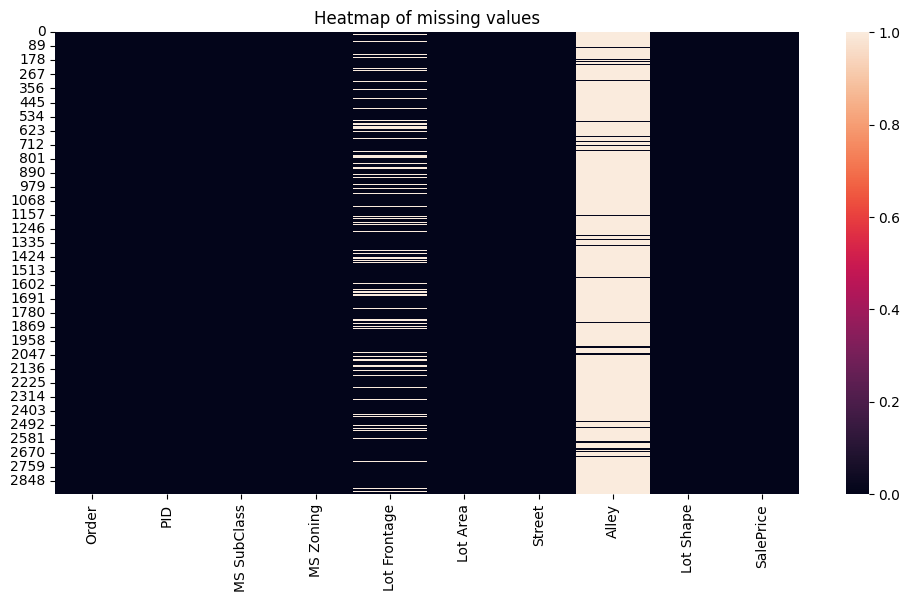

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title("Heatmap of missing values")

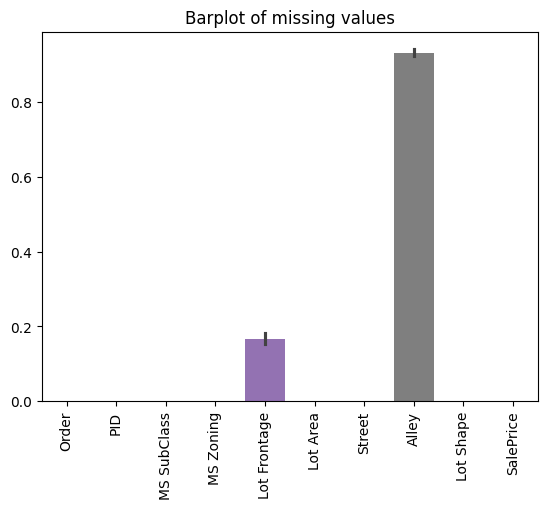

In [12]:
sns.barplot(df.isnull())
plt.xticks(rotation=90)
plt.title("Barplot of missing values")
plt.show()

### Count null values in a specific column.

In [13]:
df['Alley'].isnull().sum()

np.int64(2732)

In [14]:
df['Lot Frontage'].isnull().sum()

np.int64(490)

### Create a summary of total missing values in a dataset.

In [15]:
df.isnull().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage     490
Lot Area           0
Street             0
Alley           2732
Lot Shape          0
SalePrice          0
dtype: int64

In [15]:
df.isnull().sum().sum() ## 490+2732

np.int64(3222)

# 📅 Day 2: Handling Missing Values

Handling missing values is a key step in data preprocessing for data analysis and machine learning. There are two main approaches: dropping and imputing.

#### 1. Dropping Missing Values
- **Description:** This method removes any rows or columns that have missing (null/NaN) values.

- **When to Use:** When the number of missing values is small and will not impact the dataset significantly.

#### 2. Imputing Missing Values
- **Description:** Replaces missing values with substituted values like mean, median, mode, or using more sophisticated techniques.

- **When to Use:** When dropping rows/columns would result in loss of too much data, or when you want to preserve the dataset’s structure.

#### Mean Imputation

- **Use for:** Numerical columns with continuous data, when the data is symmetrically distributed (no significant outliers).

- **Best for:** Filling missing values in datasets where average better represents missing values than extremes.

- **Example:** Imputing missing temperatures in weather data.

#### Median Imputation

- **Use for:** Numerical columns with skewed distributions or outliers.

- **Best for:** Robust to extreme values; use when data is not symmetrically distributed.

- **Example:** Imputing house prices in a dataset with some very high or very low prices.

#### Mode Imputation

- **Use for:** Categorical columns or discrete numerical columns, especially when some values repeat frequently.

- **Best for:** Filling missing values in data where the most common value is a logical substitute.

- **Example:** Imputing missing values for "preferred payment method" in a survey.

#### Forward Fill (ffill)

- **Use for:** Time series and sequential data, when the previous value is likely to carry forward.

- **Best for:** When it makes sense for the last known value to fill missing spaces (e.g., stock prices, sensor data).

- **Example:** Imputing missing hourly stock prices by carrying forward the last known value.

#### Backward Fill (bfill)

- **Use for:** Time series and sequential data, when the next value is more representative.

- **Best for:** When future values can reasonably replace previous gaps.

- **Example:** Imputing missing hourly sensor readings with the next available value.

In [16]:
df.isnull().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage     490
Lot Area           0
Street             0
Alley           2732
Lot Shape          0
SalePrice          0
dtype: int64

Now we have either remove or impute missing values in Lot frontage and Alley

<Axes: xlabel='Lot Frontage', ylabel='Count'>

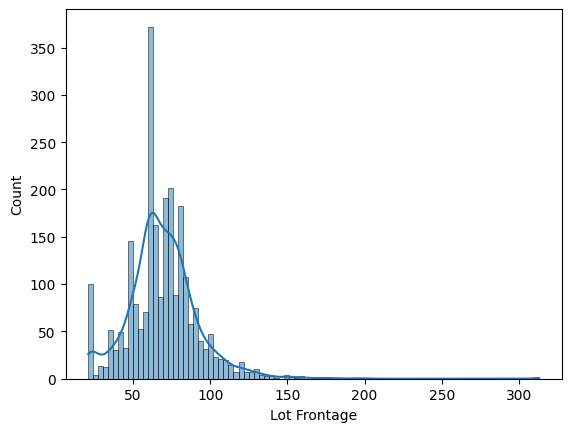

In [17]:
sns.histplot(df['Lot Frontage'], kde=True)

Data is skewed

In [18]:
df['Lot Frontage'].unique()

array([141.,  80.,  81.,  93.,  74.,  78.,  41.,  43.,  39.,  60.,  75.,
        nan,  63.,  85.,  47., 152.,  88., 140., 105.,  65.,  70.,  26.,
        21.,  53.,  24., 102.,  98.,  83.,  94.,  95.,  90.,  79., 100.,
        44., 110.,  61.,  36.,  67., 108.,  59.,  92.,  58.,  56.,  73.,
        72.,  84.,  76.,  50.,  55.,  68., 107.,  25.,  30.,  57.,  40.,
        77., 120., 137.,  87., 119.,  64.,  96.,  71.,  69.,  52.,  51.,
        54.,  86., 124.,  82.,  38.,  48.,  89.,  66.,  45.,  35., 129.,
        31.,  42.,  28.,  99., 104.,  97., 103.,  34., 117., 149., 122.,
        62., 174., 106., 112.,  32., 115., 128.,  91.,  33., 121., 144.,
       130., 109., 150., 113., 125., 101.,  46., 114., 135., 136.,  37.,
        22., 313.,  49., 123., 160., 195., 118., 134., 182., 116., 138.,
       155., 126., 200., 168., 111., 131., 153., 133.])

Data is continous and skewed. So impute with median

In [19]:
df['Lot Frontage'].median()

68.0

In [20]:
df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_10332\2943091932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_10332\2943091932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lot Frontage'].fillna(df['Lot Frontage'].media

In [21]:
df.isnull().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley           2732
Lot Shape          0
SalePrice          0
dtype: int64

<Axes: xlabel='Alley', ylabel='Count'>

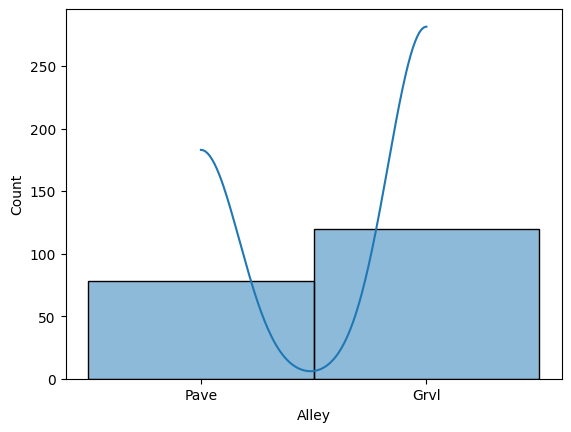

In [22]:
sns.histplot(df['Alley'], kde=True)

In [23]:
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

Data is categorical so use mode to impute missing values

In [24]:
df['Alley'].mode()

0    Grvl
Name: Alley, dtype: object

In [25]:
df['Alley'].fillna(df['Alley'].mode()[0], inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_10332\3684775811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alley'].fillna(df['Alley'].mode()[0], inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_10332\3684775811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alley'].fillna(df['Alley'].mode()[0], inplace=True)


In [26]:
df.isnull().sum()

Order           0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
Lot Area        0
Street          0
Alley           0
Lot Shape       0
SalePrice       0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order         2930 non-null   int64  
 1   PID           2930 non-null   int64  
 2   MS SubClass   2930 non-null   int64  
 3   MS Zoning     2930 non-null   object 
 4   Lot Frontage  2930 non-null   float64
 5   Lot Area      2930 non-null   int64  
 6   Street        2930 non-null   object 
 7   Alley         2930 non-null   object 
 8   Lot Shape     2930 non-null   object 
 9   SalePrice     2930 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 229.0+ KB


In [28]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Grvl,IR1,215000
1,2,526350040,20,RH,80.0,11622,Pave,Grvl,Reg,105000
2,3,526351010,20,RL,81.0,14267,Pave,Grvl,IR1,172000
3,4,526353030,20,RL,93.0,11160,Pave,Grvl,Reg,244000
4,5,527105010,60,RL,74.0,13830,Pave,Grvl,IR1,189900


In [29]:
df.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,Grvl,IR1,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,Grvl,IR1,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Grvl,Reg,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Grvl,Reg,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,Grvl,Reg,188000


Drop columns Order and PID, because it is not a useful feature.

In [30]:
df.drop(['Order','PID'],axis=1, inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_10332\130305512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Order','PID'],axis=1, inplace=True)


In [31]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,SalePrice
0,20,RL,141.0,31770,Pave,Grvl,IR1,215000
1,20,RH,80.0,11622,Pave,Grvl,Reg,105000
2,20,RL,81.0,14267,Pave,Grvl,IR1,172000
3,20,RL,93.0,11160,Pave,Grvl,Reg,244000
4,60,RL,74.0,13830,Pave,Grvl,IR1,189900


# 📅 Day 3: Detecting Outliers

Detecting Outliers means finding data points that are unusually far from most others in a dataset. Outliers can distort analysis, so spotting them (with boxplots, IQR, or z-scores) helps improve data quality.

**Use IQR method**

- When your data is not normally distributed or is skewed.

- Especially for boxplot-based or non-parametric data.

- IQR is best for smaller datasets and categorical/ordinal data.

**Use Z-score method**

- When your data is normally distributed (follows Gaussian distribution).

- Useful for large continuous datasets.

- Z-scores flag points that are many standard deviations from the mean.

<Axes: ylabel='MS SubClass'>

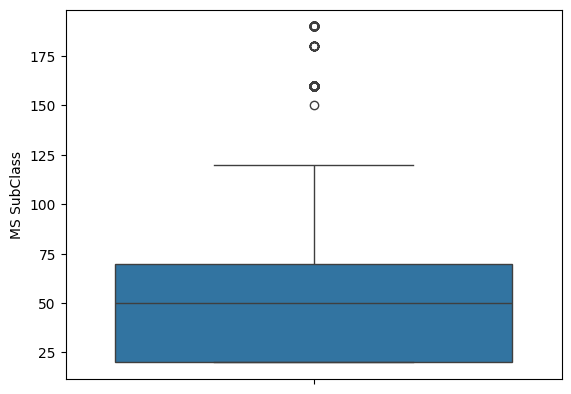

In [32]:
sns.boxplot(df['MS SubClass'])

<Axes: xlabel='MS SubClass', ylabel='Count'>

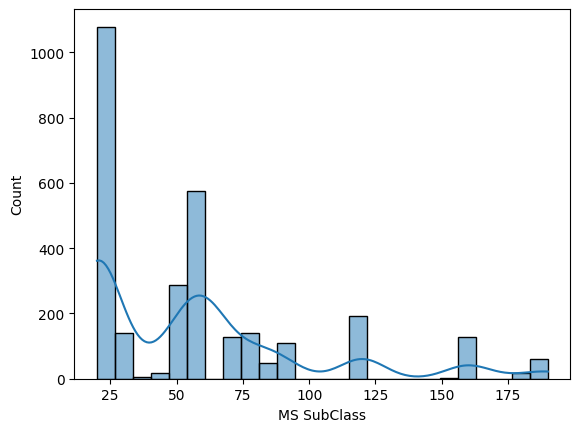

In [33]:
sns.histplot(df['MS SubClass'], kde=True)

Not symmetric. Use IQR method

#### IQR Method



In [34]:
sorted = np.sort(df['MS SubClass'])
sorted

array([ 20,  20,  20, ..., 190, 190, 190], shape=(2930,))

In [35]:
q1 = np.percentile(sorted,25,method='midpoint')
q3 = np.percentile(sorted,75,method='midpoint')
q1,q3

(np.float64(20.0), np.float64(70.0))

In [36]:
iqr=q3-q1
low_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
iqr,low_limit,upper_limit

(np.float64(50.0), np.float64(-55.0), np.float64(145.0))

In [36]:
outliers=[]
for i in sorted:
    if i < low_limit or i > upper_limit:
        outliers.append(i)
print(outliers,len(outliers))

[np.int64(150), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(160), np.int64(

Here number of outliers is too high. So we use **capping** method.
**Capping means** limiting extreme values in your data to a certain maximum (upper cap) and minimum (lower cap) — instead of removing them.

In [37]:
df['MS SubClass']=df['MS SubClass'].clip(lower=low_limit, upper=upper_limit)

C:\Users\moham\AppData\Local\Temp\ipykernel_10332\332420454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MS SubClass']=df['MS SubClass'].clip(lower=low_limit, upper=upper_limit)


In [38]:
df['MS SubClass'].unique()

array([ 20,  60, 120,  50,  85, 145,  80,  30,  90,  45,  70,  75,  40])

In [39]:
df.shape

(2930, 8)

In [40]:
bars = df.select_dtypes(int,float)
bars

,MS SubClass,Lot Area,SalePrice
0,20,31770,215000
1,20,11622,105000
2,20,14267,172000
3,20,11160,244000
4,60,13830,189900
...,...,...,...
2925,80,7937,142500
2926,20,8885,131000
2927,85,10441,132000
2928,20,10010,170000


<Axes: >

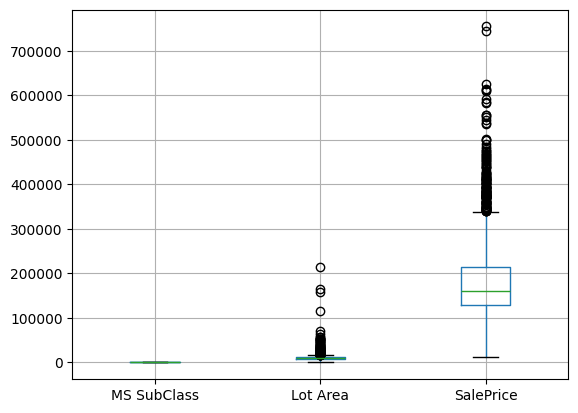

In [41]:
bars.boxplot()

In [42]:
df['Lot Area'].value_counts()

Lot Area
9600     43
7200     42
6000     32
9000     28
8400     21
         ..
8049      1
11170     1
8098      1
14331     1
31770     1
Name: count, Length: 1858, dtype: int64

In [44]:
sorted=np.sort(df['Lot Area'])

In [45]:
q1=np.percentile(sorted,25,method='midpoint')
q3=np.percentile(sorted,75,method='midpoint')
q1,q3

(np.float64(7440.5), np.float64(11554.5))

In [46]:
iqr=q3-q1
iqr

np.float64(4114.0)

In [47]:
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
lower,upper

(np.float64(1269.5), np.float64(17725.5))

In [48]:
outliers=[]
for i in df['Lot Area']:
    if i<lower or i>upper:
        outliers.append(i)
print(outliers,len(outliers))

[31770, 53504, 19138, 18494, 18837, 19900, 24090, 20062, 23595, 18600, 19645, 57200, 26142, 23303, 24682, 46589, 29959, 17871, 19296, 21384, 25095, 19255, 26400, 28698, 21695, 21780, 215245, 21750, 21872, 31220, 47280, 20544, 18559, 19508, 24572, 27650, 18386, 21286, 20270, 39104, 53227, 45600, 19550, 21780, 47007, 63887, 26073, 18000, 23730, 164660, 18265, 17979, 21750, 56600, 18160, 51974, 41600, 21535, 19522, 17778, 18890, 22002, 18450, 21281, 18030, 25339, 115149, 22692, 17808, 23920, 159000, 53107, 20064, 39290, 40094, 22420, 21000, 25485, 21579, 17871, 20693, 32668, 18044, 19958, 35133, 43500, 25286, 25000, 32463, 33983, 27697, 39384, 19378, 23257, 18062, 34650, 18261, 18800, 20431, 21930, 35760, 20896, 50271, 20781, 25419, 21299, 22136, 18275, 22950, 33120, 21370, 17920, 20355, 19690, 19950, 19800, 36500, 21453, 70761, 21533, 17755, 21780, 23580, 26178, 50102, 31250, 20000] 127


In [49]:
df['Lot Area']=df['Lot Area'].clip(lower=lower,upper=upper)

C:\Users\moham\AppData\Local\Temp\ipykernel_10332\4165391572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lot Area']=df['Lot Area'].clip(lower=lower,upper=upper)


In [53]:
df['Lot Area'].value_counts()

Lot Area
17725.5    127
9600.0      44
7200.0      43
6000.0      34
9000.0      29
          ... 
11751.0      1
13175.0      1
11394.0      1
12134.0      1
6820.0       1
Name: count, Length: 1838, dtype: int64

<Axes: ylabel='Lot Area'>

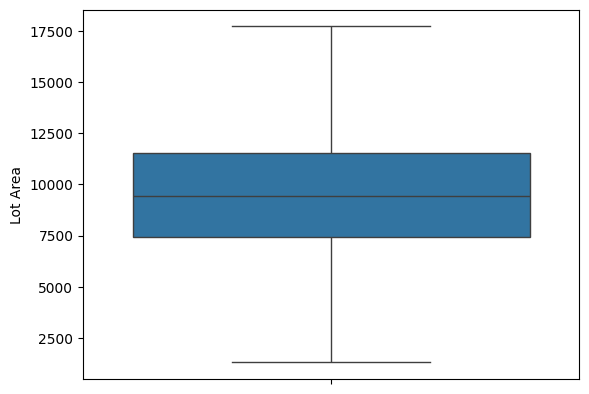

In [55]:
sns.boxplot(df['Lot Area'])

<Axes: xlabel='Lot Area', ylabel='Count'>

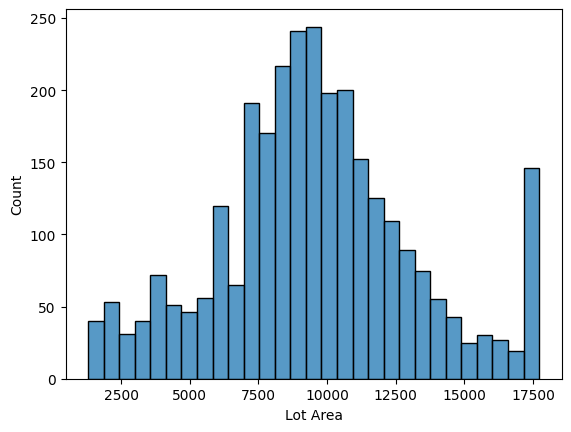

In [65]:
sns.histplot(df['Lot Area'])

In [56]:
df['SalePrice'].value_counts()

SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
97900      1
117250     1
164990     1
163990     1
173900     1
Name: count, Length: 1032, dtype: int64

In [57]:
sorted=np.sort(df['SalePrice'])
q1=np.percentile(df['SalePrice'],25,method='midpoint')
q3=np.percentile(df['SalePrice'],75,method='midpoint')
q1,q3

(np.float64(129500.0), np.float64(213500.0))

In [58]:
iqr=q3-q1
iqr

np.float64(84000.0)

In [59]:
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
lower,upper

(np.float64(3500.0), np.float64(339500.0))

In [60]:
outliers=[]
for i in df['SalePrice']:
    if i<lower or i>upper:
        outliers.append(i)
print(outliers,len(outliers))

[538000, 394432, 376162, 395192, 611657, 500000, 355000, 410000, 362500, 378500, 345000, 377500, 375000, 501837, 372500, 462000, 485000, 555000, 398800, 404000, 402861, 451950, 610000, 582933, 360000, 409900, 350000, 386250, 445000, 552000, 382500, 403000, 340000, 402000, 468000, 370878, 375000, 410000, 425000, 355000, 387000, 394617, 426000, 385000, 446261, 372402, 417500, 383000, 390000, 460000, 379000, 615000, 412500, 421250, 370000, 367294, 370967, 350000, 350000, 341000, 339750, 372500, 345000, 475000, 395039, 381000, 392500, 370000, 377426, 349265, 591587, 392000, 441929, 455000, 356000, 345474, 415298, 492000, 450000, 479069, 395000, 380000, 440000, 418000, 500067, 372000, 342000, 354000, 350000, 745000, 384500, 466500, 410000, 755000, 430000, 419005, 340000, 373000, 383970, 424870, 360000, 359100, 375000, 392000, 457347, 545224, 356383, 556581, 361919, 535000, 401179, 438780, 470000, 412083, 342643, 465000, 415000, 345000, 344133, 360000, 372397, 378000, 374000, 437154, 348000,

In [61]:
df['SalePrice']=df['SalePrice'].clip(lower=lower,upper=upper)

C:\Users\moham\AppData\Local\Temp\ipykernel_10332\1492506900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice']=df['SalePrice'].clip(lower=lower,upper=upper)


<Axes: ylabel='SalePrice'>

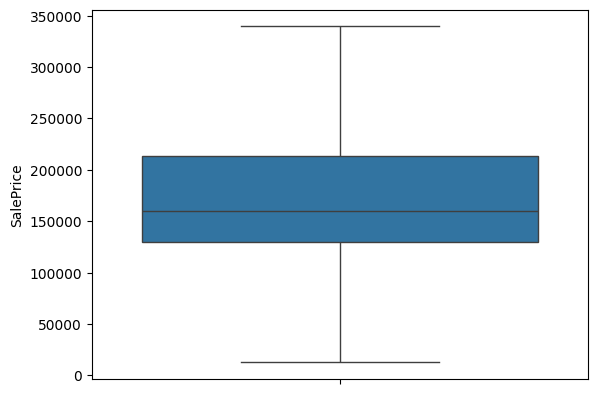

In [62]:
sns.boxplot(df['SalePrice'])

In [63]:
numeric=df.select_dtypes(int,float)

array([[<Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

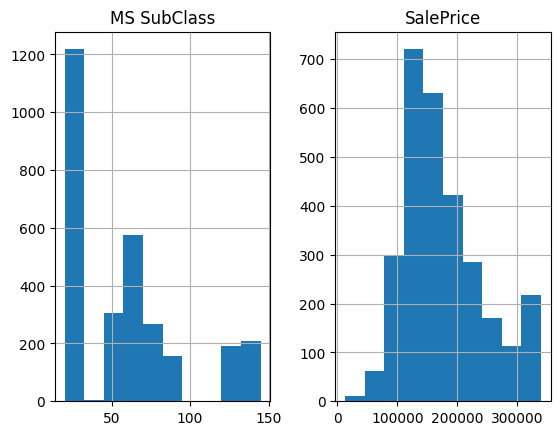

In [64]:
numeric.hist()

In [67]:
df.select_dtypes(include=['int','float'])

,MS SubClass,Lot Frontage,Lot Area,SalePrice
0,20,141.0,17725.5,215000
1,20,80.0,11622.0,105000
2,20,81.0,14267.0,172000
3,20,93.0,11160.0,244000
4,60,74.0,13830.0,189900
...,...,...,...,...
2925,80,37.0,7937.0,142500
2926,20,68.0,8885.0,131000
2927,85,62.0,10441.0,132000
2928,20,77.0,10010.0,170000


<BarContainer object of 2930 artists>

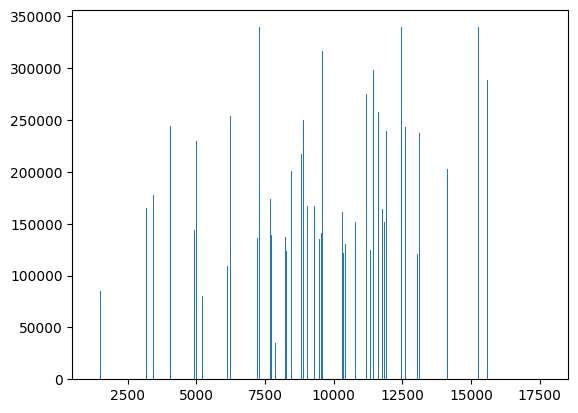

In [72]:
plt.bar(df['Lot Area'],df['SalePrice'])

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

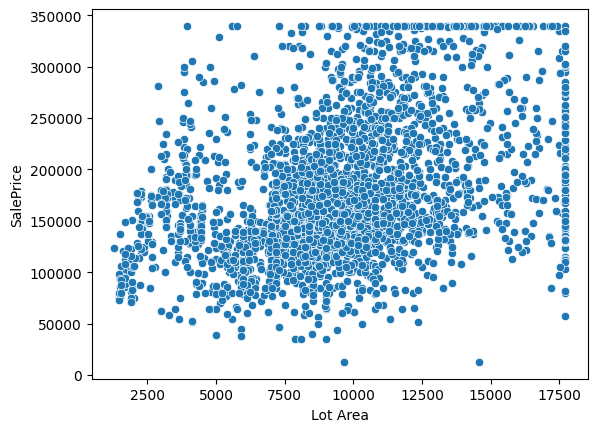

In [73]:
sns.scatterplot(x='Lot Area',y='SalePrice',data=df)